# Исследование успешности игры

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Замена названий столбцов(приведение к нижнему регистру)

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Изменение типов данных

In [7]:
pd.options.mode.chained_assignment = None  # default='warn'

# Удаляем записи со значением NA в столбце year_of_release,
# так как они составляют всего лишь 1,6 % от общего числа записей.
games = games.dropna(subset=['year_of_release'])

# Заменим 'tbd'(to be determined) в столбце user_score на значение None
games['user_score'] = games['user_score'].replace('tbd', None)

# Меняем тип данных
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')

Столбцы, в которых потребовалось изменить тип данных, и почему:
- year_of_release: поменяли тип с float64 на int64; год не может быть представлен в виде дробного числа
- user_score: поменяли тип с object на float64; подходящий тип для оценки пользователей(максимум 10) float64, так как она может быть представлена дробным числом

### Обработка пропусков и дубликатов

In [8]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         7836
rating             6678
dtype: int64

In [9]:
games = games.dropna(subset=['name', 'genre'])

В каких столбцах наблюдаются пропуски и что было с ними сделано:
- name, year_of_release, genre: процент записей со значением NA в данных столбцах очень мал, поэтому записи с такими значениями удалены(записи для year_of_release удалены в предыдущем задании)
- critic_score, user_score, rating: пропуски в данных столбцах оставлены, так как невозможно каким-либо способом правильно вычислить оценки критиков и пользователей, а также рейтинг от организации ESRB         

Причины пропусков:
- столбцы не заполнены случайно
- нет точных данных(например, для года выпуска)
- жанр не определен
- игра еще не оценена критиками и/или пользователями
- рейтинг еще не установлен организацией ESRB

Значение 'tbd' в столбце с оценкой пользователей.
- Данная аббревиатура означает "to be determined(будет определено)". Для обработки этого значения можно заменить его на значение None(что было сделано в предыдущем задании с целью приведения типа). Значение None визуально отличимо от значения NaN. И поэтому его также условно(предварительно договорившись для чего мы его используем) можно использовать в смысле "to be determined".

In [10]:
games.duplicated().sum()

0

### Расчет суммарных продаж

In [11]:
games['sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных

### Выпуск игр в разные годы

<AxesSubplot:xlabel='year_of_release'>

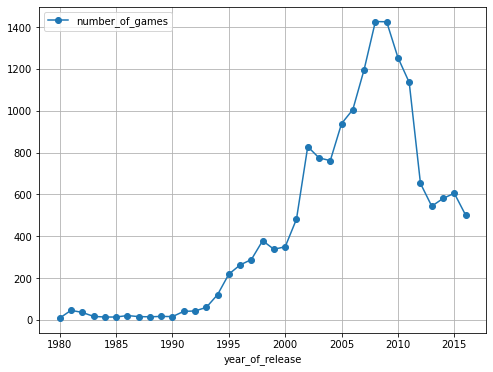

In [12]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.rename(columns={'name': 'number_of_games'}).plot(style='o-', figsize=(8, 6), grid=True)

Важны ли данные за все периоды? 
- Учитывая, что количество выпускаемых игр в разные годы колеблется(то увеличивается, то уменьшается), лучше смотреть данные за какой-то определенный период. Например, за 5 или 10 лет.

### Продажи по платформам

In [13]:
sales_platform = games.groupby('platform').agg({'sales': 'sum'})\
.sort_values(by='sales', ascending=False)\
.head(10)
sales_platform

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [14]:
sales_platform.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [15]:
sales_platform_years = games\
.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
sales_platform_years = sales_platform_years[sales_platform.index]
sales_platform_years

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS
year_of_release,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
import matplotlib.pyplot as plt

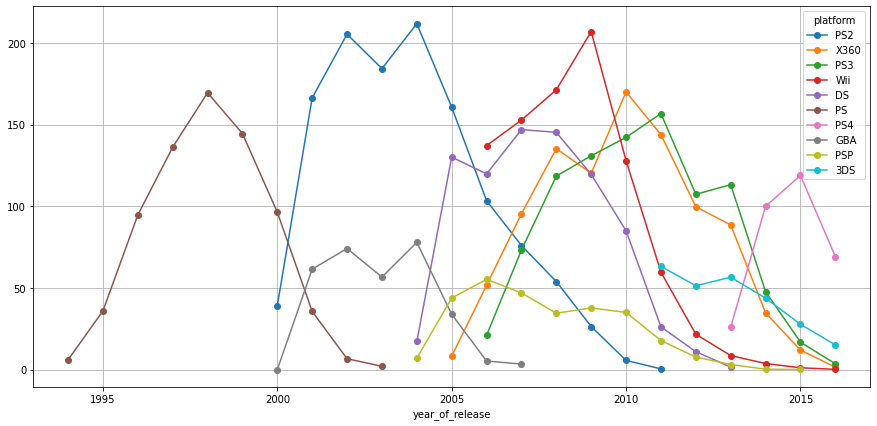

In [17]:
sales_platform_years.plot(style='o-', figsize=(15, 7), grid=True)
plt.xlim(1993, 2017)
plt.show()

За какой характерный срок появляются новые и исчезают старые платформы?
- По данным графика за 8-12 лет, в среднем за 10 лет.

### Определение актуального периода и анализ платформ по продажам

Учитывая данные и график выше, а также развитие ниши gamedev и IT-отрасли в целом, необходимость прогноза на 2017 год, "актуальным периодом" будем считать период с 2010 по 2016 года.

<AxesSubplot:xlabel='year_of_release'>

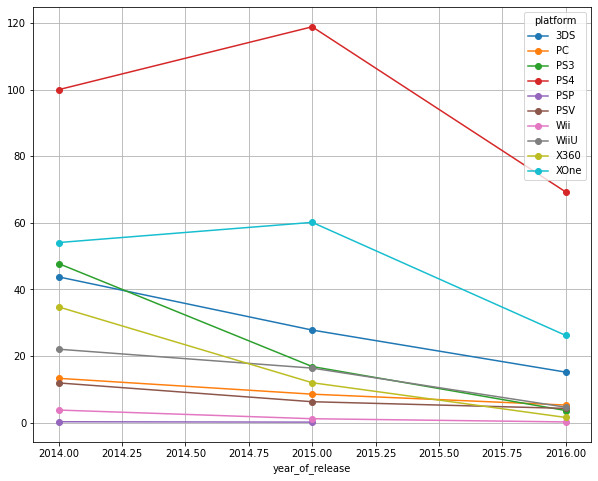

In [18]:
report = games.query('year_of_release >= 2014')
report = report\
.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
report.plot(style='o-', figsize=(10, 8), grid=True)

Какие платформы лидируют по продажам, растут или падают?
- рост продаж наблюдался с 2014 по 2015 гг. у двух платформ -- PS4 и XOne , затем падение в 2015-2016 гг. 
- у остальных платформ в период с 2014 по 2016 гг. в основном наблюдается падение показателей продаж; меньше всех продажи у платформ PSP и Wii

Потенциально прибыльные платформы: PS4 и XOne.

### Глобальные продажи игр 

<AxesSubplot:ylabel='Количество продаж, млн. копий'>

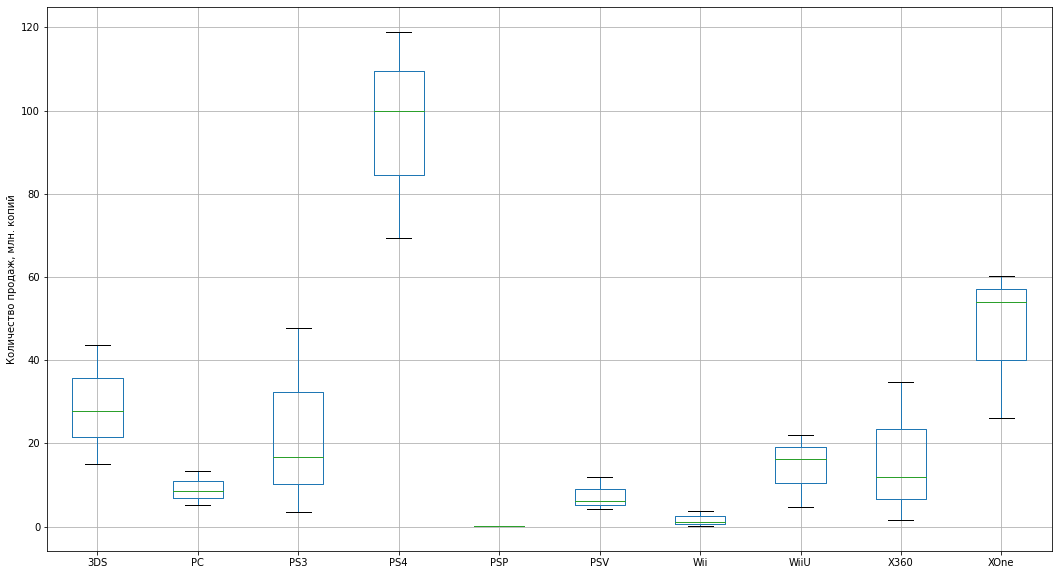

In [19]:
report.plot(kind='box', figsize=(18, 10), grid=True, ylabel='Количество продаж, млн. копий')

In [20]:
report.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.180000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.084853,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.120000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.150000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.180000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.210000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.240000,11.900000,3.750000,22.030000,34.740000,60.140000


In [21]:
import seaborn as sns

In [22]:
report = games.query('year_of_release >= 2014')

<AxesSubplot:xlabel='platform', ylabel='sales'>

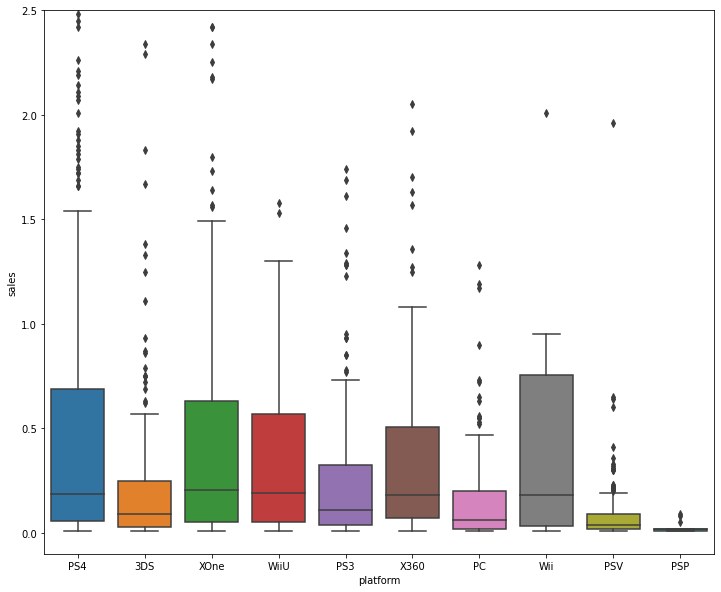

In [23]:
plt.figure(figsize=(12, 10))
plt.ylim(-0.1, 2.5)
sns.boxplot(x='platform', y='sales', data=report)

Описание результата:
1. больше всего продаж наблюдается по платформам PS3 и XOne:
- медиана у этих 2 платформ 100 и 57 млн. копий соответственно
- имеют сдвиг распределения в отрицательную сторону(нижний "ус" длиннее верхнего)
2. меньше всего продаж у платформы PSP и Wii: медианы соответственно 180000 и 1140000 копий

### Влияние на продажи отзывов пользователей и критиков

Самой популярной платформой(по проведенным выше исследованиям по актуальному периоду) является PS3.

In [24]:
ps3_data = games.query('platform == "PS3"')

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

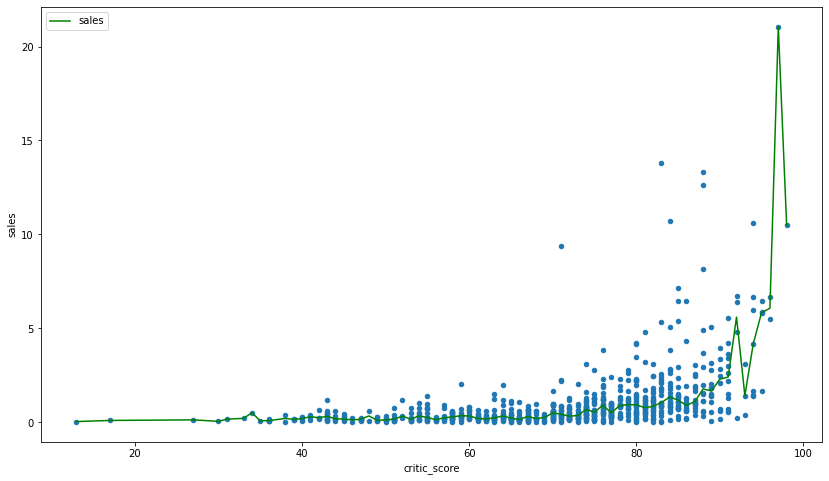

In [25]:
ax1 = ps3_data.plot(x='critic_score', y='sales', kind='scatter', figsize=(14, 8))
ps3_data_median1 = ps3_data.pivot_table(index='critic_score', values='sales', aggfunc='median')
ps3_data_median1.plot(ax=ax1, color='green')

<AxesSubplot:xlabel='user_score', ylabel='sales'>

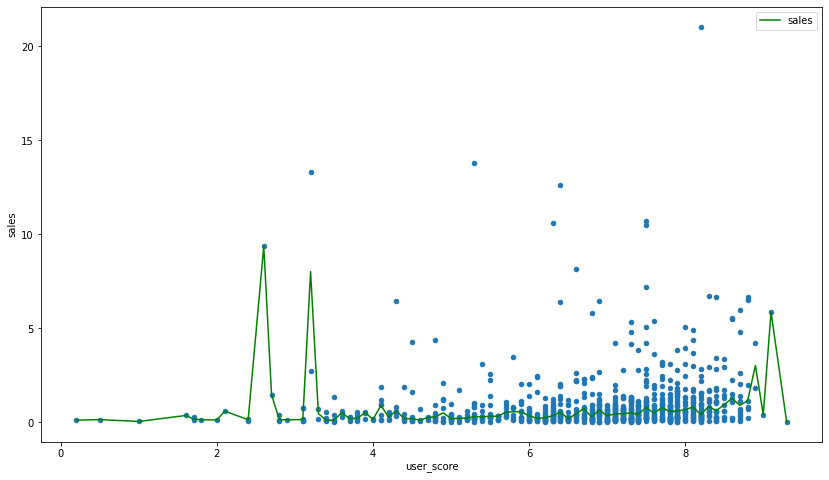

In [26]:
ax2 = ps3_data.plot(x='user_score', y='sales', kind='scatter', figsize=(14, 8))
ps3_data_median2 = ps3_data.pivot_table(index='user_score', values='sales', aggfunc='median')
ps3_data_median2.plot(ax=ax2, color='green')

In [27]:
ps3_data['sales'].corr(ps3_data['critic_score'])

0.4327589578997135

In [28]:
ps3_data['sales'].corr(ps3_data['user_score'])

0.12328238779204483

Выводы:
- коэффициенты корреляции показывают, что связь есть, но не сильно выражена в обоих случаях(хотя связь между оценкой критиков и продажами сильнее, чем связь между оценкой пользователей и продажами)
- графики: при оценке критиков больше 70 и при оценке пользователей больше 6 количество продаж заметно увеличивается по сравнению с более низкими соответствующими оценками -- это показывают и диаграмма рассеяния, и график медианы продаж(исключая, конечно, некоторые единичные выбросы)

Соотнесем выводы с продажами игр на других платформах. Для этого построим диаграммы рассеяния и вычислим коэффициенты корреляции для менее популярных платформ, например, XOne и DS(взяты из графика "ящик с усами" по актуальному периоду).

In [29]:
xone_data = games.query('platform == "XOne"')

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

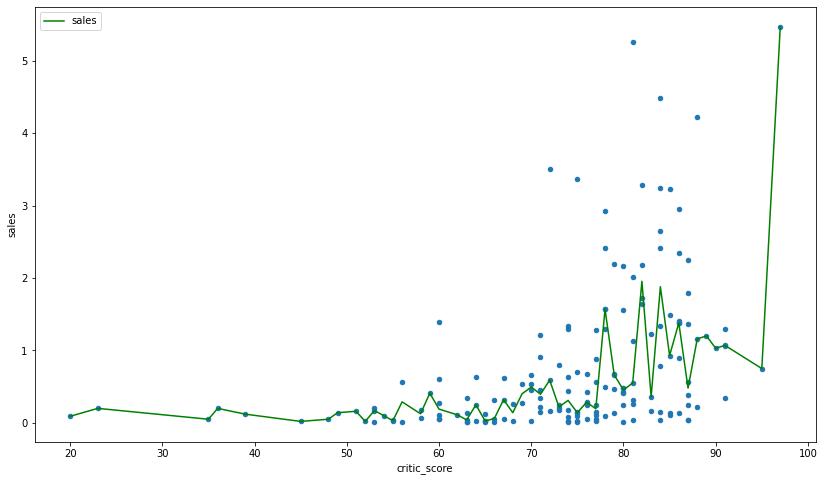

In [30]:
ax3 = xone_data.plot(x='critic_score', y='sales', kind='scatter', figsize=(14, 8))
xone_data_median1 = xone_data.pivot_table(index='critic_score', values='sales', aggfunc='median')
xone_data_median1.plot(ax=ax3, color='green')

<AxesSubplot:xlabel='user_score', ylabel='sales'>

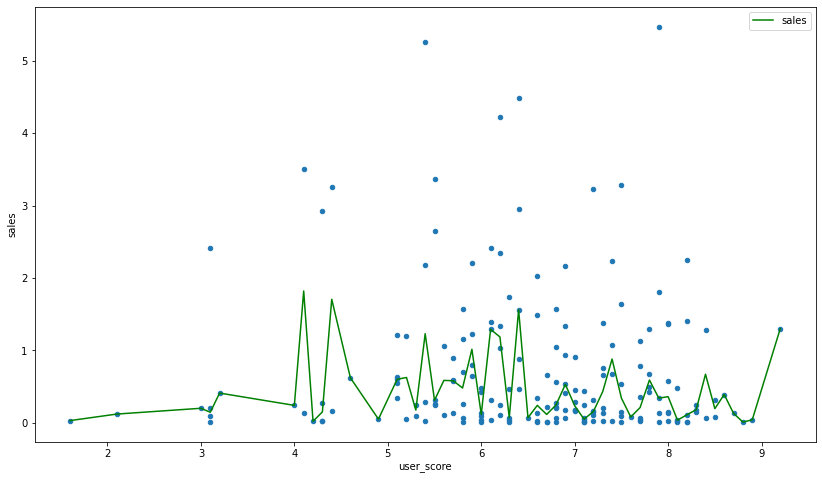

In [31]:
ax4 = xone_data.plot(x='user_score', y='sales', kind='scatter', figsize=(14, 8))
xone_data_median2 = xone_data.pivot_table(index='user_score', values='sales', aggfunc='median')
xone_data_median2.plot(ax=ax4, color='green')

In [32]:
xone_data['sales'].corr(xone_data['critic_score'])

0.41699832800840175

In [33]:
xone_data['sales'].corr(xone_data['user_score'])

-0.07050537515177652

In [34]:
ds_data = games.query('platform == "DS"')

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

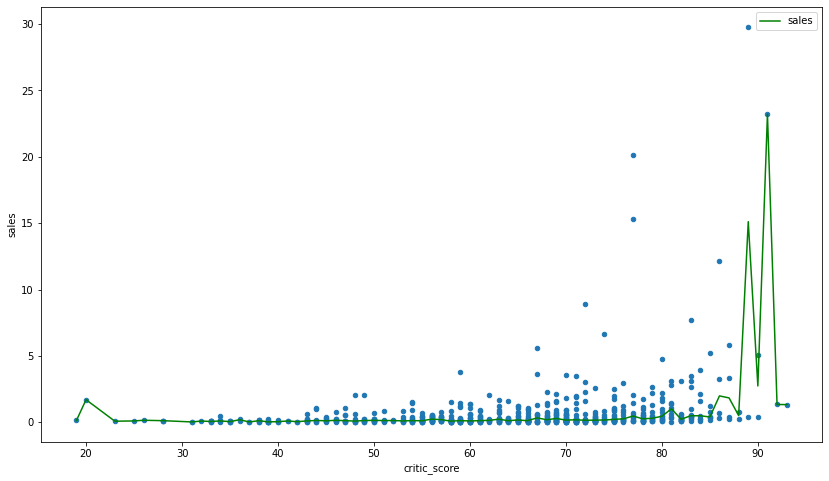

In [35]:
ax5 = ds_data.plot(x='critic_score', y='sales', kind='scatter', figsize=(14, 8))
ds_data_median1 = ds_data.pivot_table(index='critic_score', values='sales', aggfunc='median')
ds_data_median1.plot(ax=ax5, color='green')

<AxesSubplot:xlabel='user_score', ylabel='sales'>

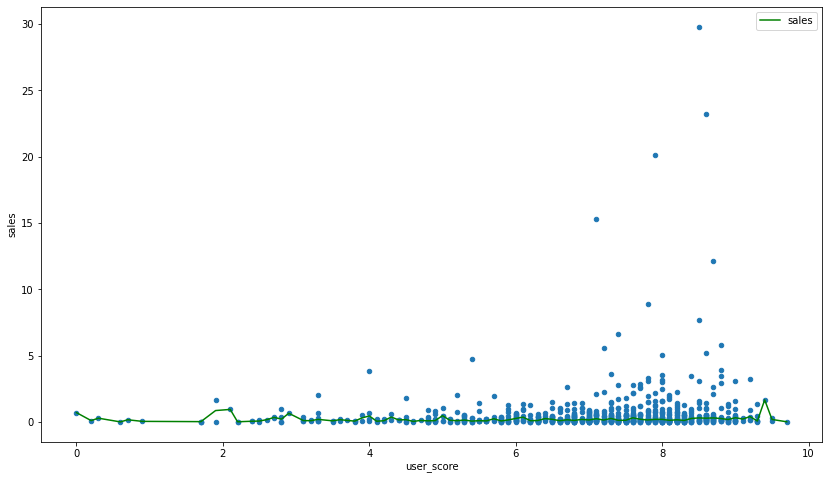

In [36]:
ax6 = ds_data.plot(x='user_score', y='sales', kind='scatter', figsize=(14, 8))
ds_data_median2 = ds_data.pivot_table(index='user_score', values='sales', aggfunc='median')
ds_data_median2.plot(ax=ax6, color='green')

In [37]:
ds_data['sales'].corr(ds_data['critic_score'])

0.23754579854113453

In [38]:
ds_data['sales'].corr(ds_data['user_score'])

0.1035571638053429

Анализ платформ XOne и DS подтвердил выводы, которые были сделаны по платформе PS3. Это говорит о том, что выводы имеют более общий характер и распространяются на все платформы.

### Исследование жанров игр

In [39]:
report = games.query('year_of_release >= 2014')

<AxesSubplot:ylabel='number_of_games'>

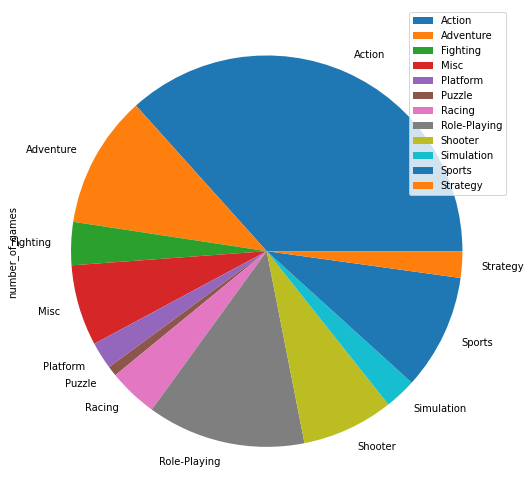

In [40]:
report\
.pivot_table(index='genre', values='name', aggfunc='count')\
.rename(columns={'name': 'number_of_games'})\
.plot(kind='pie', y='number_of_games', figsize=(9, 9))

<AxesSubplot:ylabel='sales'>

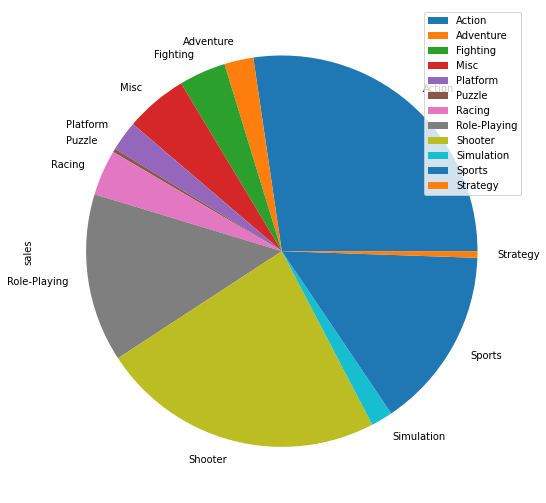

In [41]:
report\
.pivot_table(index='genre', values='sales', aggfunc='sum')\
.plot(kind='pie', y='sales', figsize=(9, 9))

Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- высокие продажи у жанров "Action" и "Shooter", они же являются самыми прибыльными жанрами; в данные жанры игр играют большее количество людей и их чаще покупают
- низкие продажи у жанров "Puzzle" и "Strategy"
- также можно предположить, что люди предпочитают более зрелищные и активные игры, чем интеллектуальные

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

Для Северной Америки:

<AxesSubplot:ylabel='na_sales'>

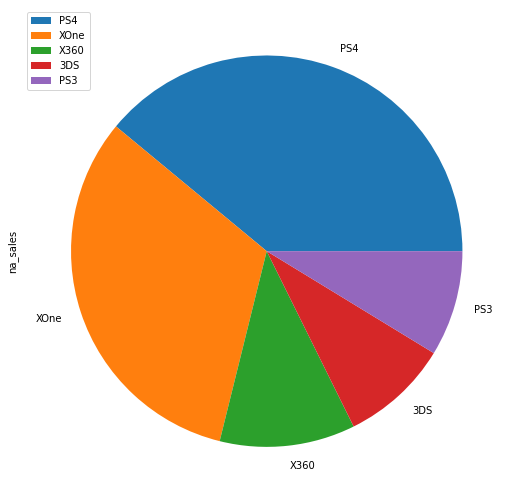

In [42]:
report\
.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.head()\
.plot(kind='pie', y='na_sales', figsize=(9, 9))

Для Европы:

<AxesSubplot:ylabel='eu_sales'>

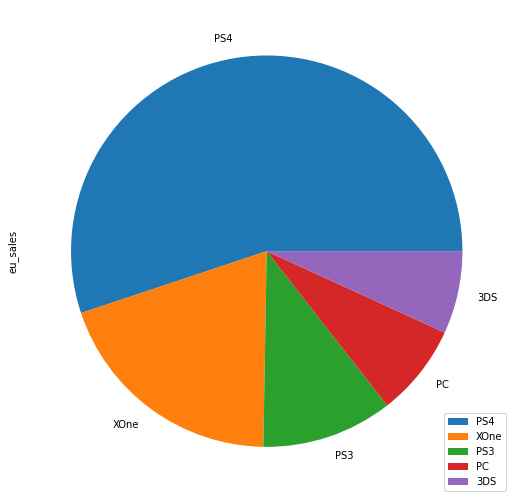

In [43]:
report\
.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)\
.head()\
.plot(kind='pie', y='eu_sales', figsize=(9, 9))

Для Японии:

<AxesSubplot:ylabel='jp_sales'>

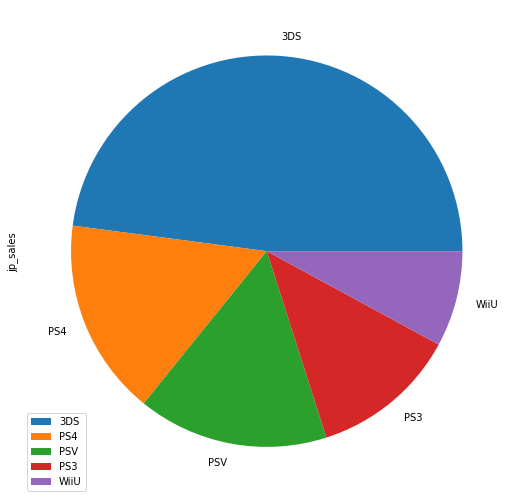

In [44]:
report\
.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)\
.head()\
.plot(kind='pie', y='jp_sales', figsize=(9, 9))

Опиcание различий в долях продаж.
- Построенные графики показывают следующие рейтинги платформ по долям продаж от большего значения к меньшему:
1. Для Северной Америки: PS4, XOne, X360, PS3=3DS
2. Для Европы: PS4, XOne, PS3, 3DS=PC
3. Для Японии: 3DS, PS4, PSV, PS3, WiiU

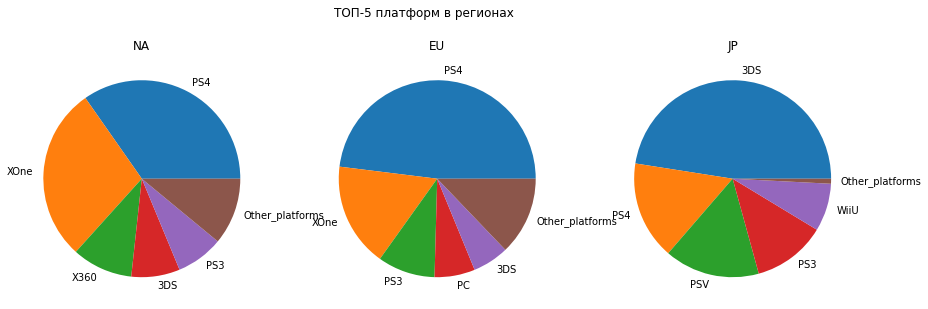

In [46]:
# задаем список регионов
countries = report.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (report.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: report[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

### Самые популярные жанры (топ-5)

Для Северной Америки:

In [ ]:
report\
.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.head()\
.plot(kind='bar', figsize=(10, 6))

Для Европы:

In [ ]:
report\
.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)\
.head()\
.plot(kind='bar', figsize=(10, 6))

Для Японии:

In [ ]:
report\
.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)\
.head()\
.plot(kind='bar', figsize=(10, 6))

В рейтингах самых популярных жанров наблюдается следующая картина(от наиболее популярного жанра к наименее):
- Для Северной Америки: Shooter, Action, Sports, Role-Playing, Misc
- Для Европы: Action, Shooter, Sports, Role-Playing, Racing
- Для Японии: Role-Playing, Action, Fighting, Misc, Shooter

###  Рейтинг ESRB 

In [ ]:
report['rating'] = report['rating'].fillna('no_rating')

Для Северной Америки:

In [ ]:
report\
.pivot_table(index='rating', values='na_sales', aggfunc='median')\
.plot(style='o-', figsize=(10, 4), grid=True)

Для Европы:

In [ ]:
report\
.pivot_table(index='rating', values='eu_sales', aggfunc='median')\
.plot(style='o-', figsize=(10, 4), grid=True)

Для Японии:

In [ ]:
report\
.pivot_table(index='rating', values='jp_sales', aggfunc='median')\
.plot(style='o-', figsize=(10, 4), grid=True)

Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Северная Америка: влияет; наибольшие продажи у рейтинга "M", наименьшие -- у "no_rating"
- Европа: влияет; наибольшие продажи у рейтинга "M", наименьшие -- у "no_rating"
- Япония: влияет; наибольшие продажи у рейтинга "no_rating", наименьшие -- у "E", "E10+", "M"

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
from scipy import stats as st

H_0: Средние пользовательские рейтинги платформ Xbox One и PC равны

H_1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

In [ ]:
report = report.dropna(subset=['user_score'])

xone_user_score = report.query('platform == "XOne"')['user_score']
pc_user_score = report.query('platform == "PC"')['user_score']

alpha = .05

results = st.ttest_ind(
    xone_user_score, 
    pc_user_score,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
    

### Средние пользовательские рейтинги жанров Action и Sports разные

H_0: Средние пользовательские рейтинги жанров Action и Sports не равны

H_1: Средние пользовательские рейтинги жанров Action и Sports равны

In [ ]:
action_user_score = report.query('genre == "Action"')['user_score']
sports_user_score = report.query('genre == "Sports"')['user_score']

alpha = .05

results = st.ttest_ind(
    action_user_score, 
    sports_user_score,
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Как вы сформулировали нулевую и альтернативную гипотезы
1. В первой задаче нам необходимо проверить гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Значит, нулевая гипотеза будет говорить о равенстве средних пользовательских рейтингов этих платформ. Альтернативная гипотеза, наоборот, -- о неравенстве.
2. Во второй задаче нам необходимо проверить гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные". Значит, нулевая гипотеза будет говорить о неравенстве средних пользовательских рейтингов этих жанров. Альтернативная гипотеза, наоборот, -- о равенстве. 

Какой критерий применили для проверки гипотез и почему
1. Для проверки гипотез было применено пороговое значение alpha в 0.05. Это одно из общепринятых значений. Если уровень значимости(pvalue) меньше alpha, то отвергаем нулевую гипотезу. То есть считаем, что эмпирически полученные данные противоречат нулевой гипотезе.
2. Был использован такой критерий, потому что уровень значимости статистического теста показывает вероятность ошибки первого рода(ложноположительного решения, false positive), то есть вероятность отклонить нулевую гипотезу, когда на самом деле она верна.

## Общий вывод

В ходе исследования была проведена следующая работа:

1. Изучена общая информация из полученного файла с данными.
2. Подготовлены данные для исследования:
- заменены названия столбцов(приведение к нижнему регистру)
- изменены типы данных: year_of_release -- поменяли тип с float64 на int64; user_score -- поменяли тип с object на float64
- обработаны пропуски в столбцах: name, year_of_release, genre -- удалены; critic_score, user_score, rating -- изучены и оставлены
- заменено значение 'tbd'(to be determined) в столбце user_score на значение None
- прозведен расчет суммарных продаж
3. Осуществлен исследовательский анализ данных:
- изучено, сколько игр выпускалось в разные годы
- выяснено, как менялись продажи по платформам: построено распределение по годам и определено, за какой характерный срок появляются новые и исчезают старые платформы
- определен актуальный период, по которому можно строить прогнозы на будущее, и проведен анализ платформ по продажам
- построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам
- определено влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков: построена диаграмма рассеяния и посчитана корреляция между отзывами и продажами
- исследованы жанры игр: построено распределение игр по жанрам, определены самые прибыльные жанры, выделены жанры с высокими и низкими продажами
4. Составлен портрет пользователя каждого региона(Северная Америка, Европа, Япония):
- определены самые популярные платформы(топ-5)
- определены самые популярные жанры(топ-5)
- выяснено, влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверены гипотезы:
- Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Вторая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Наблюдения:

- за 8-12 лет, в среднем за 10 лет появляются новые и исчезают старые платформы
- рост продаж наблюдался с 2014 по 2015 гг. у двух платформ -- PS4 и XOne , затем падение в 2015-2016 гг.
- у остальных платформ в период с 2014 по 2016 гг. в основном наблюдается падение показателей продаж; меньше всех продажи у платформ PSP и Wii
- потенциально прибыльные платформы: PS4 и XOne
- глобальные продажи игр:
1. больше всего продаж наблюдается по платформам PS3 и XOne: медиана у этих 2 платформ 100 и 57 млн. копий соответственно
2. меньше всего продаж у платформы PSP и Wii: медианы соответственно 180000 и 1140000 копий
- при оценке критиков больше 70 и при оценке пользователей больше 6 количество продаж заметно увеличивается по сравнению с более низкими соответствующими оценками
- высокие продажи у жанров "Action" и "Shooter", они же являются самыми прибыльными жанрами; в данные жанры игр играют большее количество людей и их чаще покупают
- низкие продажи у жанров "Puzzle" и "Strategy"
- также можно предположить, что люди предпочитают более зрелищные и активные игры, чем интеллектуальные
- самые популярные платформы(топ-5):
1. Для Северной Америки: PS4, XOne, X360, PS3=3DS
2. Для Европы: PS4, XOne, PS3, 3DS=PC
3. Для Японии: 3DS, PS4, PSV, PS3, WiiU
- самые популярные жанры(топ-5):
1. Для Северной Америки: Shooter, Action, Sports, Role-Playing, Misc
2. Для Европы: Action, Shooter, Sports, Role-Playing, Racing
3. Для Японии: Role-Playing, Action, Fighting, Misc, Shooter
- влияние рейтинга ESRB на продажи:
1. Северная Америка: влияет; наибольшие продажи у рейтинга "M", наименьшие -- у "no_rating"
2. Европа: влияет; наибольшие продажи у рейтинга "M", наименьшие -- у "no_rating"
3. Япония: влияет; наибольшие продажи у рейтинга "no_rating", наименьшие -- у "E", "E10+", "M"
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports одинаковые

<div class=> 
<b>Общий комментарий ревьюера </b> 
    
Отличный проект, тобою проделана большая работа, ты молодец!

Хвалю за наличие хороших промежуточных (и общего) выводов, комментариев и рассуждений - твой проект интересно проверять. Также очень хорошее оформление проекта (в том числе наличие вступления). Сделано все именно так, как требуется. По коду вопросов тоже нет.

Что обязательно стоит изменить: 
    
1. Изменить актуальный период
2. Посмотреть наличие дубликатов
3. Включить игры без рейтинга от ESRB в анализ.

Также, я оставил некоторое количество желтых комментариев. Думаю, они будут полезны и ты также что-либо поменяешь, потому что это сделает твой проект лучше.

Буду ждать доработок :)
    
Удачи!